In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [5]:
df = pd.read_csv('/content/AAPL.csv')

In [16]:
df

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1.0


In [12]:
df.isna().sum()

,0
Unnamed: 0,0
symbol,0
date,0
close,0
high,0
low,0
open,0
volume,0
adjClose,0
adjHigh,0


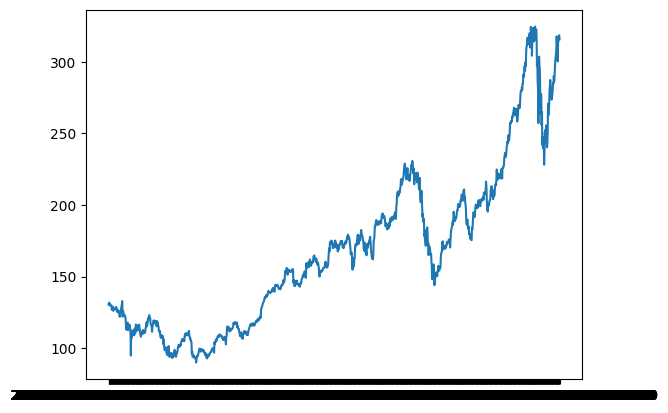

In [13]:
plt.plot(df["date"],df["open"])
plt.show()

In [15]:
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

In [44]:
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(df["close"].values.reshape(-1, 1))

seq_len = 200
X, y = create_sequences(scaled_prices, seq_len)

In [45]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [46]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(seq_len, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=15, batch_size=16)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0326
Epoch 2/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.5644e-04
Epoch 3/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.5840e-04
Epoch 4/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.1731e-04
Epoch 5/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.5224e-04
Epoch 6/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.9658e-04
Epoch 7/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.1727e-04
Epoch 8/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.1079e-04
Epoch 9/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.4016e-04
Epoch 10/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6.6482e-04
Epoch 11/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.3395e-04
Epoch 12/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.3080e-04
Epoch 13/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.9330e-04
Epoch 14/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.2816e-04
Epoch 15/15
67/67 ━━━━━━━━━━━━━━━━━━━

In [47]:
pred = model.predict(X)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


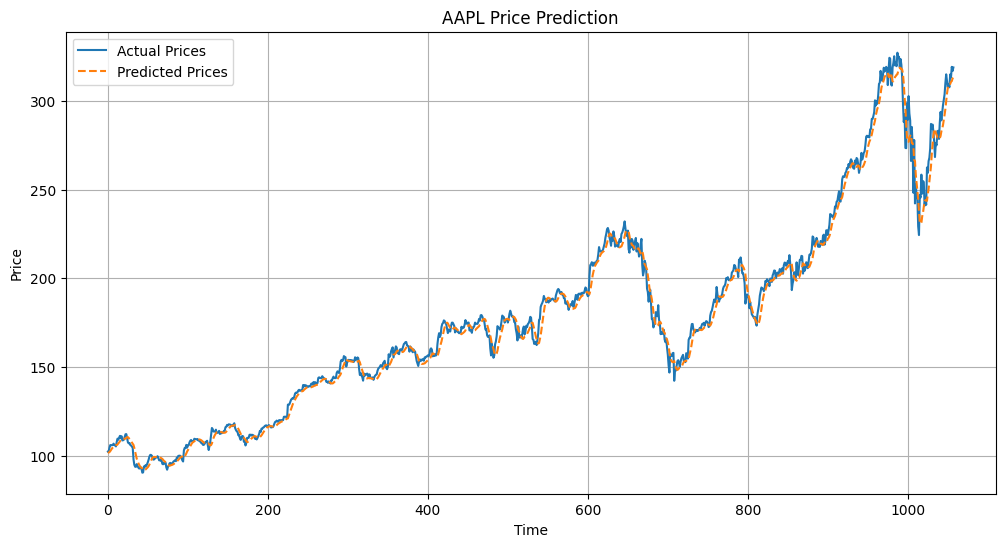

In [48]:
actual_prices = scaler.inverse_transform(y.reshape(-1, 1))

# 8. Plot
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices', linestyle='--')
plt.title('AAPL Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
test = pd.read_csv("/content/portfolio_data.csv")

In [50]:
test.head()

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


In [51]:
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(test["AMZN"].values.reshape(-1, 1))

seq_len = 200
X, y = create_sequences(scaled_prices, seq_len)

In [52]:
pred = model.predict(X)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


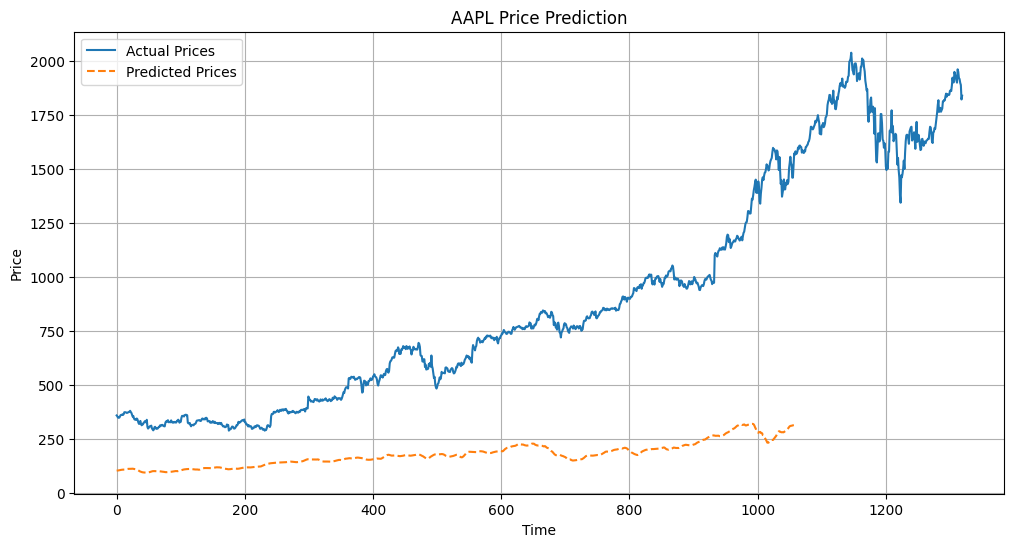

In [53]:
actual_prices = scaler.inverse_transform(y.reshape(-1, 1))

# 8. Plot
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices', linestyle='--')
plt.title('AAPL Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()